In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

# Делал все задания по порядку
### Не успел проставить номера вопросов, надеюсь не критично

In [2]:
data = pd.read_csv("litres_programming_data.csv")
data.head(5)

,Unnamed: 0,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
2,3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
3,4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
4,7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


In [3]:
data.shape

(965, 13)

In [6]:
data.isnull().sum()

Unnamed: 0         0
name               0
author             0
link               0
rating             0
rating_count       0
review_count       0
price              0
pages              0
pages_count        0
text_of_reviews    0
age                0
year               0
dtype: int64

In [12]:
def age_change(age):
    return int(age[:-1])

data['age'] = data['age'].apply(age_change)

data.dtypes


Unnamed: 0           int64
name                object
author              object
link                object
rating             float64
rating_count         int64
review_count         int64
price              float64
pages               object
pages_count          int64
text_of_reviews     object
age                  int64
year                 int64
dtype: object

In [8]:
data.describe()

,Unnamed: 0,rating,rating_count,review_count,price,pages_count,year
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,594.935751,2.543420,10.338860,1.603109,348.744021,222.014508,2016.327461
std,347.276914,2.193727,36.058249,3.134103,279.907683,236.922129,5.646624
min,0.000000,0.000000,0.000000,0.000000,40.000000,2.000000,1985.000000
25%,297.000000,0.000000,0.000000,0.000000,129.000000,12.000000,2012.000000
50%,593.000000,3.600000,1.000000,0.000000,200.000000,163.000000,2017.000000
75%,900.000000,4.600000,6.000000,2.000000,549.000000,362.000000,2021.000000
max,1197.000000,5.000000,433.000000,37.000000,2200.000000,1223.000000,2024.000000


In [9]:
data['price'].median()

200.0

In [14]:
data['age'].mode()[0]

0

In [16]:
data['review_count'].mean()

1.6031088082901555

In [17]:
data[data['rating'] < 4.25].shape[0]

619

In [18]:
data['year'].mode()[0]

2021

In [34]:
import re

def get_pages_count(pages):
    return re.search(r'(\d+)', pages).group(1)

data['pages_count_new'] = data['pages'].apply(get_pages_count)
data.head(20)

,Unnamed: 0,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,pages_count_new,is_popular
0,0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12,2023,102,1
1,1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0,2023,831,0
2,3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12,2019,130,0
3,4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0,2021,10,0
4,7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0,2020,166,0
5,8,Высоконагруженные приложения. Программирование...,Мартин Клеппман,https://www.litres.ru/book/martin-kleppman-173...,4.0,51,11,799.0,640 стр.,640,"['Не могу что-либо про перевод сказать, читал ...",16,2017,640,0
6,9,Становление и развитие компьютерных специально...,С. В. Харитонов,https://www.litres.ru/book/v-v-dik/stanovlenie...,0.0,0,0,168.0,3 стр.,3,[],0,2016,3,0
7,10,Применение нечетких множеств для формирования ...,Г. В. Тарасова,https://www.litres.ru/book/g-v-tarasova/primen...,3.0,2,0,168.0,5 стр.,5,[],0,2010,5,0
8,11,Программирование на VBA в Excel. Самоучитель,Елена Яковлева,https://www.litres.ru/book/nina-komolova/progr...,5.0,1,1,549.0,512 стр.,512,"['Что мне особенно понравилось в этой книге, т...",0,2024,512,0
9,12,Разработка веб-приложений в Yii 2,Марк Сафронов,https://www.litres.ru/book/mark-safronov-76539...,3.2,10,1,519.0,394 стр.,394,"['Жаль потраченных денег, в книге очень много ...",0,2014,394,0


In [25]:
is_popular = ((data['rating'] >= 4.6) & (data['review_count'] >= 5))
data['is_popular'] = is_popular.astype(int)
data.head()

,Unnamed: 0,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,pages_count_new,is_popular
0,0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12,2023,102,1
1,1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0,2023,831,0
2,3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12,2019,130,0
3,4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0,2021,10,0
4,7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0,2020,166,0


In [33]:
print(f'Как отличается среднее число страниц среди популярных и непопулярных книг: '
      f'{abs(data[data["is_popular"] == 1]["pages_count"].mean() - data[data["is_popular"] == 0]["pages_count"].mean())}'
      )

Как отличается среднее число страниц среди популярных и непопулярных книг: 164.34140541264736


In [41]:
data.nlargest(10, 'review_count').head(10)

,Unnamed: 0,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,pages_count_new,is_popular
0,0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12,2023,102,1
775,961,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,599.0,224 стр.,224,['Прекрасная книга. Рекомендовал и старшим шко...,16,2017,224,0
98,117,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,299.0,210 стр.,210,"['Отличная книга чтобы начать программировать,...",12,2017,210,0
692,857,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,377,19,690.0,231 стр. 20 иллюстраций,231,['Отличная серия! Обложки просто кайф. Много п...,12,2023,231,1
494,605,"Изучаем Python: программирование игр, визуализ...",Эрик Мэтиз,https://www.litres.ru/book/erik-metiz/izuchaem...,4.3,74,18,699.0,512 стр.,512,"['Осторожно, под видом второго издания продает...",16,2021,512,0
89,107,Облачные технологии. Практическое руководство ...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/oblac...,5.0,268,17,690.0,212 стр. 5 иллюстраций,212,['Автор не перестает радовать годными книгами....,12,2024,212,1
458,560,Путь лидера,Джейд Картер,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,173,17,199.0,215 стр. 10 иллюстраций,215,['Отличное руководство. Расписан каждый шаг. Д...,12,2023,215,1
528,648,"Swift. Основы разработки приложений под iOS, i...",Василий Усов,https://www.litres.ru/book/vasiliy-usov/swift-...,3.1,64,17,499.0,545 стр.,545,['Книга хорошая. Все подробно описано. Единств...,16,2021,545,0
481,592,Программирование на C++ в примерах и задачах,Алексей Васильев,https://www.litres.ru/book/aleksey-nikolaevich...,4.0,78,16,419.0,369 стр.,369,"['Я купил эту книгу в бумажном виде, прочитав ...",12,2017,369,0
760,943,1С:Предприятие 8.3. Практическое пособие разра...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/1s-p...,4.5,72,15,180.0,983 стр.,983,['Книга супер!!! Даю проверенный совет. Прошла...,12,2023,983,0


### Пропустил 9.Найдите среднюю длину отзыва (в символах). (2)

In [47]:
data.corr()

ValueError: could not convert string to float: 'Нейросети начало'

Чето я туплю наверное, но вроде corr() сам числовые значения выбирает, мб ошибаюсь
(разобраться не успеваю)

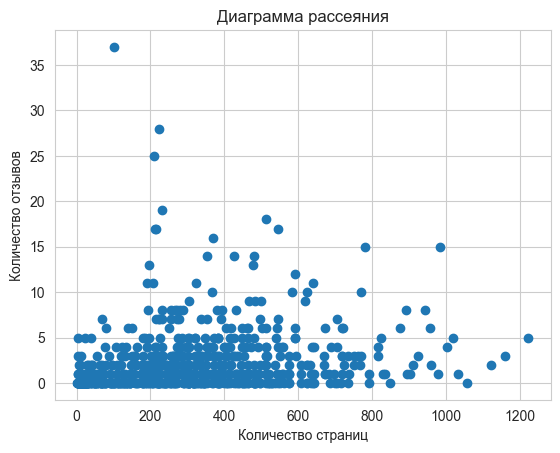

In [51]:
plt.scatter(data['pages_count'], data['review_count'])
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество страниц')
plt.ylabel('Количество отзывов')
plt.show()

In [62]:
data_books = data['year'].value_counts()
data_books = data_books['year'].sort_values()
data_books.plot()
plt.title('Количество книг по годам')
plt.xlabel('Год')
plt.ylabel('Количество книг')
plt.show()

KeyError: 'year'